# Modelos Lineales, Regresion y Validacion de Modelos

**Curso:** Fundamentos de Programación y Analítica de Datos con Python  
**Duración estimada del bloque:** 2 horas (dentro de la sesión total de 4 horas)  

## Objetivos específicos
- Implementar modelos lineales (regresión simple y múltiple) en Python con `scikit-learn`.
- Interpretar parámetros (pendientes e intercepto) y estimar el ajuste del modelo.
- Evaluar el desempeño con métricas apropiadas (MSE, MAE, R²) y análisis de residuos.
- Aplicar validación con `train_test_split` y validación cruzada para mitigar sobreajuste.
- Comparar modelos y realizar **tuning** básico (p. ej., regularización Ridge/Lasso).

## Prerrequisitos
- Python 3.11+ con entorno virtual (venv o conda) y VS Code (extensiones: Python, Jupyter, Pylance).
- Conocimientos básicos de `numpy`, `pandas` y gráficos con `matplotlib`.
- Haber visto nociones introductorias de estadística descriptiva (media, varianza) y álgebra lineal elemental.

## 1. Modelo lineal y regresión simple

### Definición
Un **modelo lineal** postula una relación lineal entre una variable respuesta \( y \) y una o más variables explicativas \( x \):
\[
y = \beta_0 + \beta_1 x + \varepsilon
\]
donde \( \beta_0 \) es el intercepto, \( \beta_1 \) la pendiente, y \( \varepsilon \) es el término de error (ruido). En **regresión simple** hay una sola variable explicativa.

### Importancia en programación y analítica de datos
- Es un modelo base para cuantificar relaciones y realizar predicciones.
- Sirve de referencia para entender conceptos de ajuste, sesgo–varianza, errores y validación.
- Es interpretable y rápido de entrenar, lo que permite prototipado ágil y benchmarking.

### Buenas prácticas profesionales y errores comunes
- **Estandarizar** características al comparar modelos con regularización o cuando hay diferentes escalas.
- Verificar **supuestos** de linealidad, homocedasticidad y normalidad aproximada de residuos para inferencia clásica.
- Evitar usar \( R^2 \) como única métrica; complementar con MSE/MAE y diagnóstico de residuos.
- Separar adecuadamente entrenamiento y prueba; no “mirar” datos de prueba durante el ajuste.

Coeficiente (pendiente): 2.9475
Intercepto: 7.2909
MSE: 3.7204 | MAE: 1.5857 | R^2: 0.9531


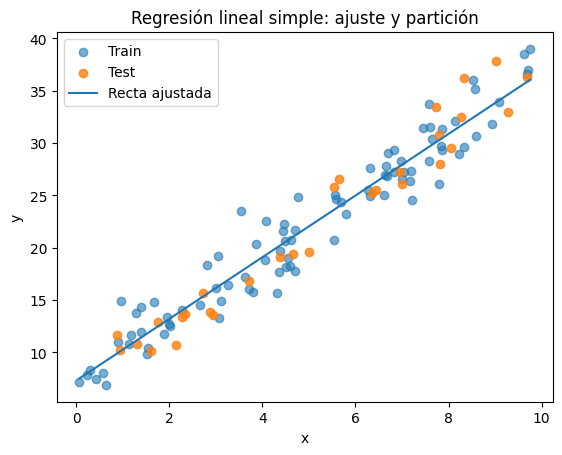

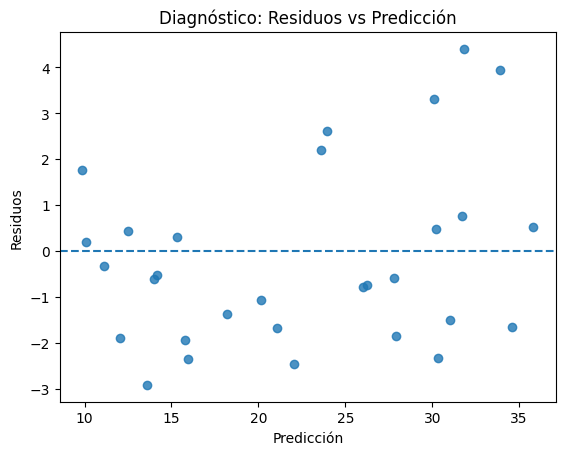

In [1]:

# Ejemplo en Python: Regresión lineal simple (datos simulados)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Reproducibilidad
rng = np.random.default_rng(42)

# Datos simulados: y = 3x + 7 + ruido
n = 120
X = rng.uniform(0, 10, size=(n, 1))
y = 3 * X.squeeze() + 7 + rng.normal(0, 2, size=n)

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Ajuste del modelo
lin = LinearRegression()
lin.fit(X_train, y_train)

# Predicción y evaluación
y_pred = lin.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Coeficiente (pendiente): {lin.coef_[0]:.4f}")
print(f"Intercepto: {lin.intercept_:.4f}")
print(f"MSE: {mse:.4f} | MAE: {mae:.4f} | R^2: {r2:.4f}")

# Visualización
plt.figure()
plt.scatter(X_train, y_train, alpha=0.6, label="Train")
plt.scatter(X_test, y_test, alpha=0.8, label="Test")
# Recta ajustada (sobre el rango observado)
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = lin.predict(x_line)
plt.plot(x_line, y_line, label="Recta ajustada")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Regresión lineal simple: ajuste y partición")
plt.legend()
plt.show()

# Diagnóstico simple de residuos
residuos = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuos, alpha=0.8)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.title("Diagnóstico: Residuos vs Predicción")
plt.show()

## 2. Regresión múltiple y regularización (Ridge/Lasso)

### Definición
En **regresión múltiple** modelamos:
\[
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p + \varepsilon
\]
La **regularización** añade penalizaciones a la magnitud de los coeficientes para mejorar la generalización:
- **Ridge (L2):** penaliza la suma de cuadrados de los coeficientes.
- **Lasso (L1):** penaliza la suma de valores absolutos y puede forzar coeficientes a cero (selección de características).

### Importancia en programación y analítica de datos
- Manejo de **multicolinealidad** y control del **sobreajuste**.
- Mejora de la **estabilidad** del modelo en presencia de muchas variables o ruido.
- Útil como base para pipelines más complejos (con estandarización y selección de variables).

### Buenas prácticas y errores comunes
- **Estandarizar** variables antes de aplicar Ridge/Lasso (p. ej., con `StandardScaler`).
- Usar **validación cruzada** para elegir hiperparámetros (p. ej., `alpha`).
- Evitar interpretar coeficientes sin considerar la escala y la colinealidad.

In [ ]:

# Ejemplo en Python: Regresión múltiple con regularización y validación cruzada
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold

# Dataset real: Diabetes (regresión)
data = load_diabetes()
X, y = data.data, data.target

# Definimos folds
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Ridge con CV
ridge_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", RidgeCV(alphas=np.logspace(-3, 3, 25), cv=cv))
])
ridge_pipe.fit(X, y)
ridge_pred = ridge_pipe.predict(X)
print("RidgeCV alpha:", ridge_pipe.named_steps["ridge"].alpha_)
print("Ridge  MSE:", mean_squared_error(y, ridge_pred), "R2:", r2_score(y, ridge_pred))

# Lasso con CV
lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", LassoCV(alphas=np.logspace(-3, 1, 25), cv=cv, random_state=42, max_iter=5000))
])
lasso_pipe.fit(X, y)
lasso_pred = lasso_pipe.predict(X)
print("LassoCV alpha:", lasso_pipe.named_steps["lasso"].alpha_)
print("Lasso  MSE:", mean_squared_error(y, lasso_pred), "R2:", r2_score(y, lasso_pred))

# Observación: no comparamos contra test externo aquí; la intención es mostrar el tuning por CV.

## 3. Validación, métricas y validación cruzada

### Definición
- **Partición train/test:** estimación honesta de desempeño fuera de muestra.
- **Validación cruzada (k-fold):** promedio de desempeño a través de k particiones, reduce varianza en la estimación.
- **Métricas en regresión:**  
  - **MSE** (Error Cuadrático Medio), **RMSE** (raíz del MSE), **MAE** (Error Absoluto Medio).  
  - **\(R^2\)**: proporción de varianza explicada por el modelo (cuidado con su interpretación).

### Importancia
- Evitar sobreajuste y seleccionar hiperparámetros de forma reproducible.
- Comparar modelos bajo el mismo procedimiento de evaluación.
- Aportar trazabilidad y rigor en la toma de decisiones de modelado.

### Buenas prácticas
- Fijar `random_state` para reproducibilidad.
- Usar **pipelines** que incluyan preprocesamiento dentro de la CV.
- Reportar métricas con intervalos (o al menos media y desviación estándar en CV).

In [ ]:

# Ejemplo: evaluación con K-Fold y reporte de métricas promedio
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

X = data.data
y = data.target

# Modelo base sin regularización (para comparar)
base_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lin", LinearRegression())
])

neg_mse_scores = cross_val_score(base_pipe, X, y, cv=5, scoring="neg_mean_squared_error")
r2_scores = cross_val_score(base_pipe, X, y, cv=5, scoring="r2")

mse_scores = -neg_mse_scores
rmse_scores = np.sqrt(mse_scores)

print("CV (5-fold) - LinearRegression + StandardScaler")
print(f"RMSE: media={rmse_scores.mean():.3f}, std={rmse_scores.std():.3f}")
print(f"R^2 : media={r2_scores.mean():.3f}, std={r2_scores.std():.3f}")

# Ejercicios integradores

A continuación encontrarás 4 ejercicios que cubren los temas del bloque. Cada ejercicio presenta un contexto técnico, datos/entradas, requerimientos, criterios de aceptación, pistas y una posible solución.

## Ejercicio 1: Calibrando un modelo base

**Contexto técnico:** Eres analista de datos en una empresa de logística. Deseas predecir el tiempo de entrega (en horas) a partir de la distancia (km). Requieres un modelo interpretable para una demo interna.

**Datos/entradas:** Genera datos simulados: \( y = 1.2 \cdot x + 3 + \varepsilon \), con \( x \sim U(0, 200) \) y \( \varepsilon \sim \mathcal{N}(0, 5^2) \), tamaño 300.

**Requerimientos:**
- Dividir datos en train/test (80/20).
- Ajustar una regresión lineal simple.
- Reportar coeficiente, intercepto, MSE, MAE y \( R^2 \) en test.
- Graficar la recta ajustada sobre los datos.

**Criterios de aceptación:**
- Que el MSE sea razonable (p. ej., \( < 30 \)) y \( R^2 > 0.85 \) (valores aproximados, pueden variar).
- Gráfico legible con leyenda y ejes etiquetados.

**Pistas:**
- Usa `train_test_split` y `LinearRegression`.
- Revisa el ejemplo de la sección 1 como guía.

In [ ]:

# Solución propuesta - Ejercicio 1
rng = np.random.default_rng(123)
n = 300
X = rng.uniform(0, 200, size=(n, 1))
y = 1.2 * X.squeeze() + 3 + rng.normal(0, 5, size=n)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print(f"Pendiente: {model.coef_[0]:.3f} | Intercepto: {model.intercept_:.3f}")
print(f"MSE: {mse:.3f} | MAE: {mae:.3f} | R^2: {r2:.3f}")

plt.figure()
plt.scatter(X_train, y_train, alpha=0.5, label="Train")
plt.scatter(X_test, y_test, alpha=0.8, label="Test")
xx = np.linspace(X.min(), X.max(), 200).reshape(-1,1)
yy = model.predict(xx)
plt.plot(xx, yy, label="Recta ajustada")
plt.xlabel("Distancia (km)")
plt.ylabel("Tiempo de entrega (h)")
plt.title("Modelo base de tiempo de entrega")
plt.legend()
plt.show()

## Ejercicio 2: Regresión múltiple con estandarización

**Contexto técnico:** Como *Data Scientist* en un e-commerce, debes predecir ingresos semanales usando características con escalas distintas (visitas, tasa de conversión, ticket medio).

**Datos/entradas:** Simula 500 observaciones con 3 variables \( x_1, x_2, x_3 \) y genera \( y = 0.5 x_1 + 20 x_2 + 100 x_3 + \varepsilon \), con ruido \( \varepsilon \sim \mathcal{N}(0, 50^2) \).

**Requerimientos:**
- Crear un `Pipeline` con `StandardScaler` y `LinearRegression`.
- Evaluar con 5-fold CV y reportar RMSE y \( R^2 \) promedio y desviación.
- Explicar por qué la estandarización es útil aquí.

**Criterios de aceptación:**
- CV ejecutado sin fugas de información (escalado dentro del pipeline).
- Reporte con media y desviación estándar de métricas.

**Pistas:**
- Usa `cross_val_score` con `scoring="neg_mean_squared_error"` y `"r2"`.

In [ ]:

# Solución propuesta - Ejercicio 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

rng = np.random.default_rng(7)
n = 500
x1 = rng.normal(1000, 200, size=n)      # visitas
x2 = rng.uniform(0.01, 0.1, size=n)     # tasa de conversión
x3 = rng.normal(20, 5, size=n)          # ticket medio
X = np.column_stack([x1, x2, x3])
y = 0.5*x1 + 20*x2 + 100*x3 + rng.normal(0, 50, size=n)

pipe = Pipeline([("scaler", StandardScaler()),
                 ("lin", LinearRegression())])

neg_mse = cross_val_score(pipe, X, y, cv=5, scoring="neg_mean_squared_error")
r2 = cross_val_score(pipe, X, y, cv=5, scoring="r2")

rmse = np.sqrt(-neg_mse)
print(f"RMSE -> media: {rmse.mean():.2f}, std: {rmse.std():.2f}")
print(f"R^2  -> media: {r2.mean():.3f}, std: {r2.std():.3f}")

## Ejercicio 3: Tuning con Ridge y Lasso

**Contexto técnico:** Un área de riesgo quiere modelos estables ante colinealidad entre variables. Te piden comparar Ridge y Lasso para elegir hiperparámetros que mejor generalicen.

**Datos/entradas:** Usa `load_diabetes()` de `sklearn.datasets` (regresión).

**Requerimientos:**
- Construir pipelines con `StandardScaler` + `RidgeCV` y `LassoCV`.
- Reportar el `alpha` óptimo y métricas de desempeño (RMSE, \( R^2 \)).
- Discutir diferencias esperadas entre ambos (p. ej., sparsity en Lasso).

**Criterios de aceptación:**
- Uso correcto de CV y reporte de hiperparámetros.
- Comparación clara con breve interpretación.

**Pistas:**
- `np.logspace` para rejillas de `alpha`; aumentar `max_iter` en Lasso si hace falta.

In [ ]:

# Solución propuesta - Ejercicio 3
from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = load_diabetes()
X, y = data.data, data.target

ridge = Pipeline([("scaler", StandardScaler()),
                  ("ridge", RidgeCV(alphas=np.logspace(-3, 3, 31), cv=5))])
ridge.fit(X, y)
r_pred = ridge.predict(X)
r_rmse = np.sqrt(mean_squared_error(y, r_pred))
r_r2 = r2_score(y, r_pred)
print(f"[RidgeCV] alpha*: {ridge.named_steps['ridge'].alpha_:.4f} | RMSE: {r_rmse:.2f} | R^2: {r_r2:.3f}")

lasso = Pipeline([("scaler", StandardScaler()),
                  ("lasso", LassoCV(alphas=np.logspace(-3, 1, 31), cv=5, random_state=42, max_iter=5000))])
lasso.fit(X, y)
l_pred = lasso.predict(X)
l_rmse = np.sqrt(mean_squared_error(y, l_pred))
l_r2 = r2_score(y, l_pred)
print(f"[LassoCV] alpha*: {lasso.named_steps['lasso'].alpha_:.4f} | RMSE: {l_rmse:.2f} | R^2: {l_r2:.3f}")

## Ejercicio 4: Validación honesta y diagnóstico de residuos

**Contexto técnico:** En un laboratorio de analítica, están preocupados por sobreajuste y por supuestos de ruido. Te piden un protocolo mínimo de validación honesta y diagnóstico de residuos.

**Datos/entradas:** Simula 400 observaciones con dos predictores correlacionados y ruido heterocedástico (varianza del error creciendo con \( x_1 \)).

**Requerimientos:**
- Particionar en train/test, ajustar `LinearRegression` con pipeline de escalado.
- Reportar RMSE y \( R^2 \) en test.
- Graficar residuos vs predicción y residuos vs \( x_1 \) para evaluar patrones (heterocedasticidad).
- Comentar brevemente hallazgos.

**Criterios de aceptación:**
- Código reproducible con `random_state` fijo.
- Gráficos claros con ejes y líneas de referencia cuando apliquen.

**Pistas:**
- Crea el ruido como `epsilon = rng.normal(0, sigma(x1))` con `sigma` creciente.

In [ ]:

# Solución propuesta - Ejercicio 4
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(2024)
n = 400
x1 = rng.normal(0, 1, size=n)
x2 = 0.8*x1 + rng.normal(0, 0.6, size=n)  # correlación con x1
sigma = 0.5 + 0.8*np.abs(x1)               # varianza crece con |x1|
eps = rng.normal(0, sigma, size=n)
y = 2.5 + 1.8*x1 - 0.9*x2 + eps

X = np.column_stack([x1, x2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

pipe = Pipeline([("scaler", StandardScaler()),
                 ("lin", LinearRegression())])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.3f} | Test R^2: {r2:.3f}")

# Diagnóstico de residuos
res = y_test - y_pred

plt.figure()
plt.scatter(y_pred, res, alpha=0.8)
plt.axhline(0, linestyle="--")
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicción (heterocedasticidad?)")
plt.show()

plt.figure()
plt.scatter(X_test[:,0], res, alpha=0.8)  # residuos vs x1
plt.axhline(0, linestyle="--")
plt.xlabel("x1 (test)")
plt.ylabel("Residuos")
plt.title("Residuos vs x1 (varianza creciente)")
plt.show()

print("Comentario: La dispersión de los residuos aumenta con el nivel de predicción y con x1, señal de heterocedasticidad.")